In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

C:\Users\sarah\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Data source:https://www.kaggle.com/sarahvch/predicting-who-pays-back-loans

In [2]:
#read data 
loans = pd.read_csv('loan_data.csv')

In [3]:
#show data
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
#get the shape of the data
loans.shape

(9578, 14)

In [51]:
#use the describe method
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [52]:
#show data
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [11]:
import pandas as pd
import sweetviz as sv

#EDA using Autoviz
sweet_report = sv.analyze(pd.read_csv("loan_data.csv"))

#Saving results to HTML file
sweet_report.show_html('sweet_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Shape of your Data Set: (9578, 14)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  6
    Number of Integer-Categorical Columns =  5
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  2
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    14 Predictors classified...
        This does not include the Target column(s)
        No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 21


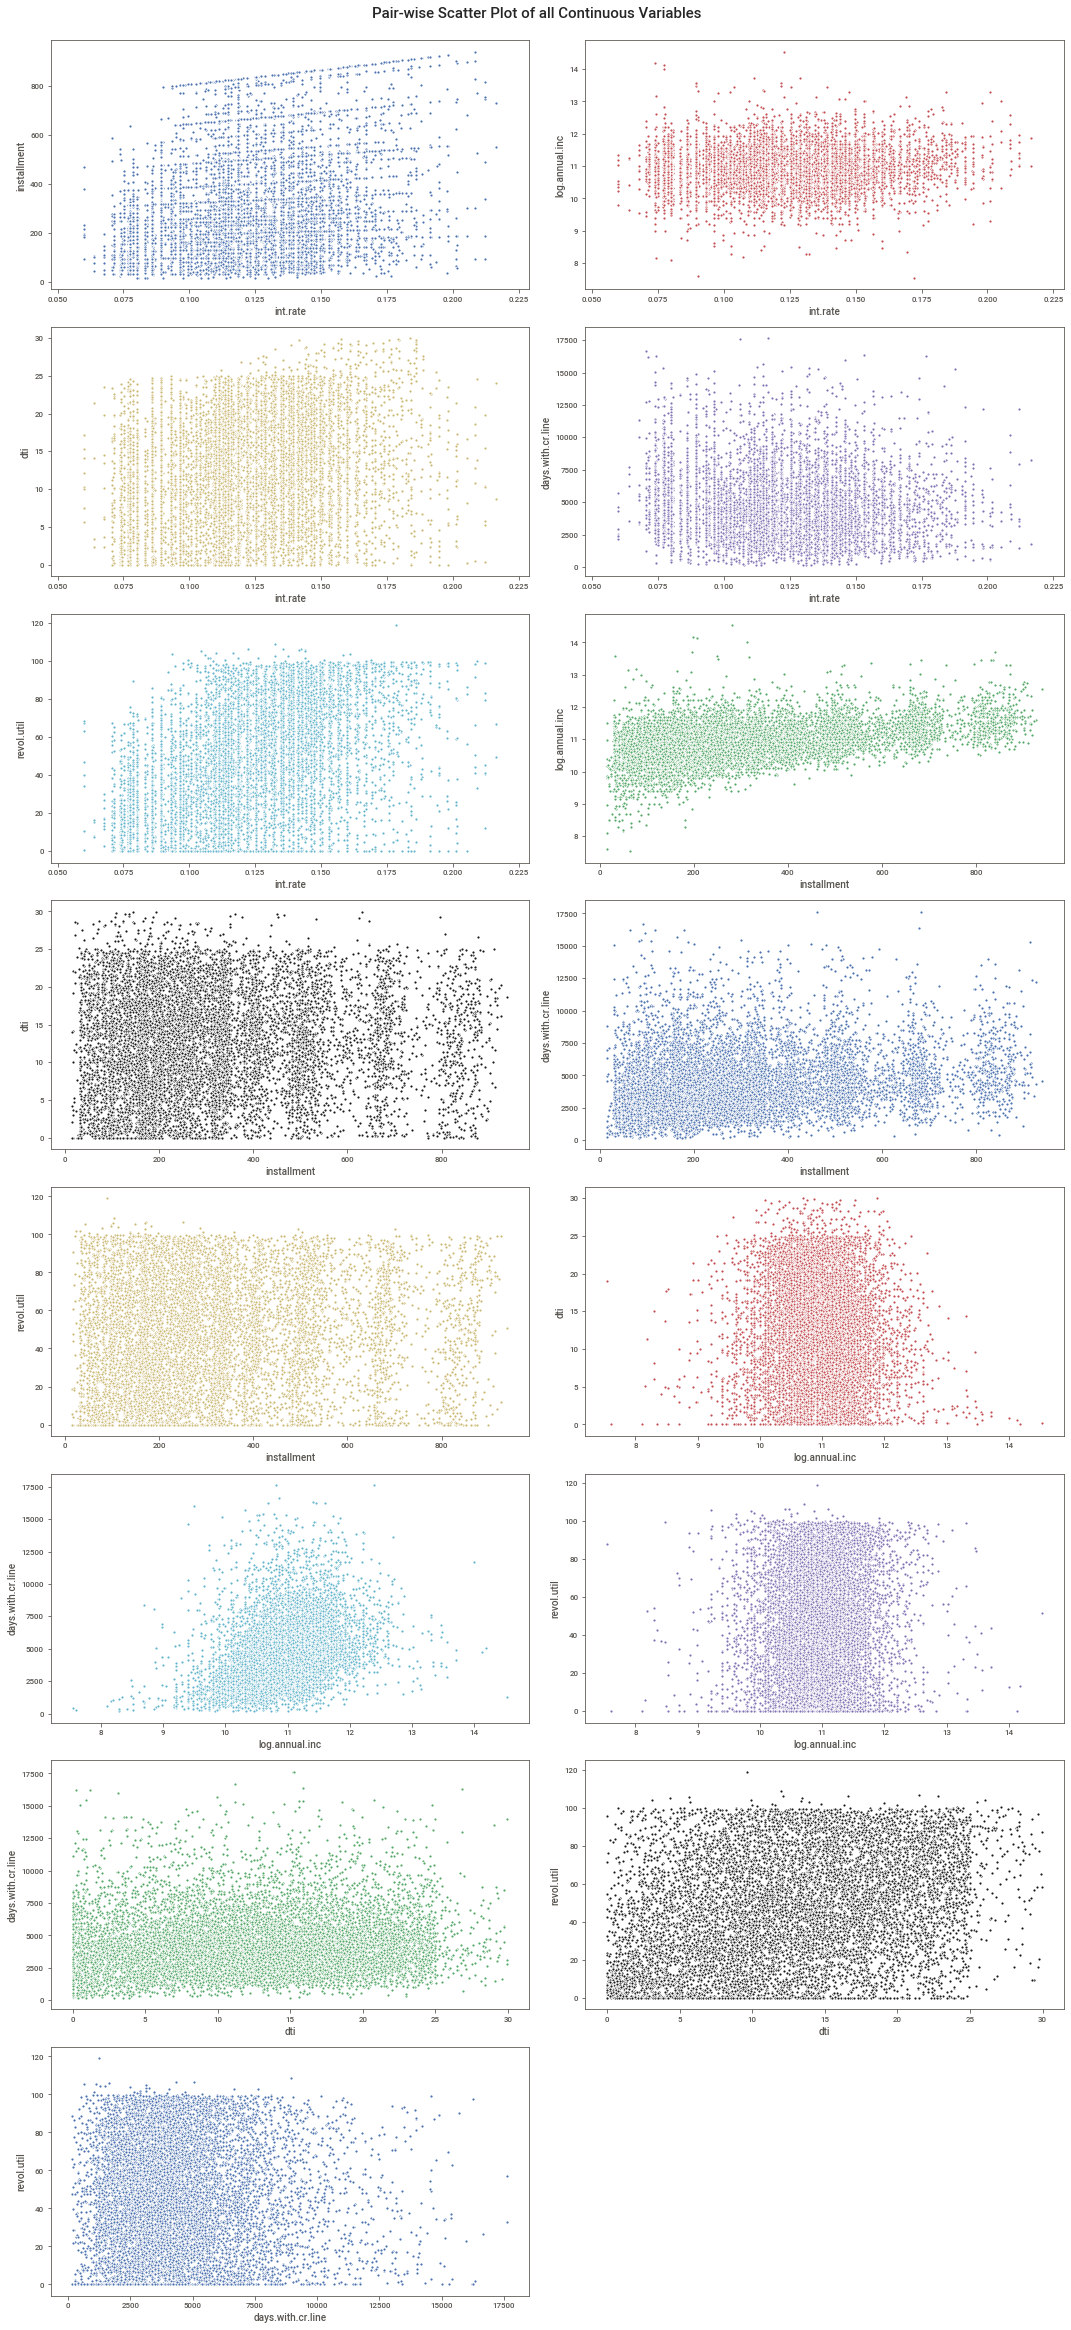

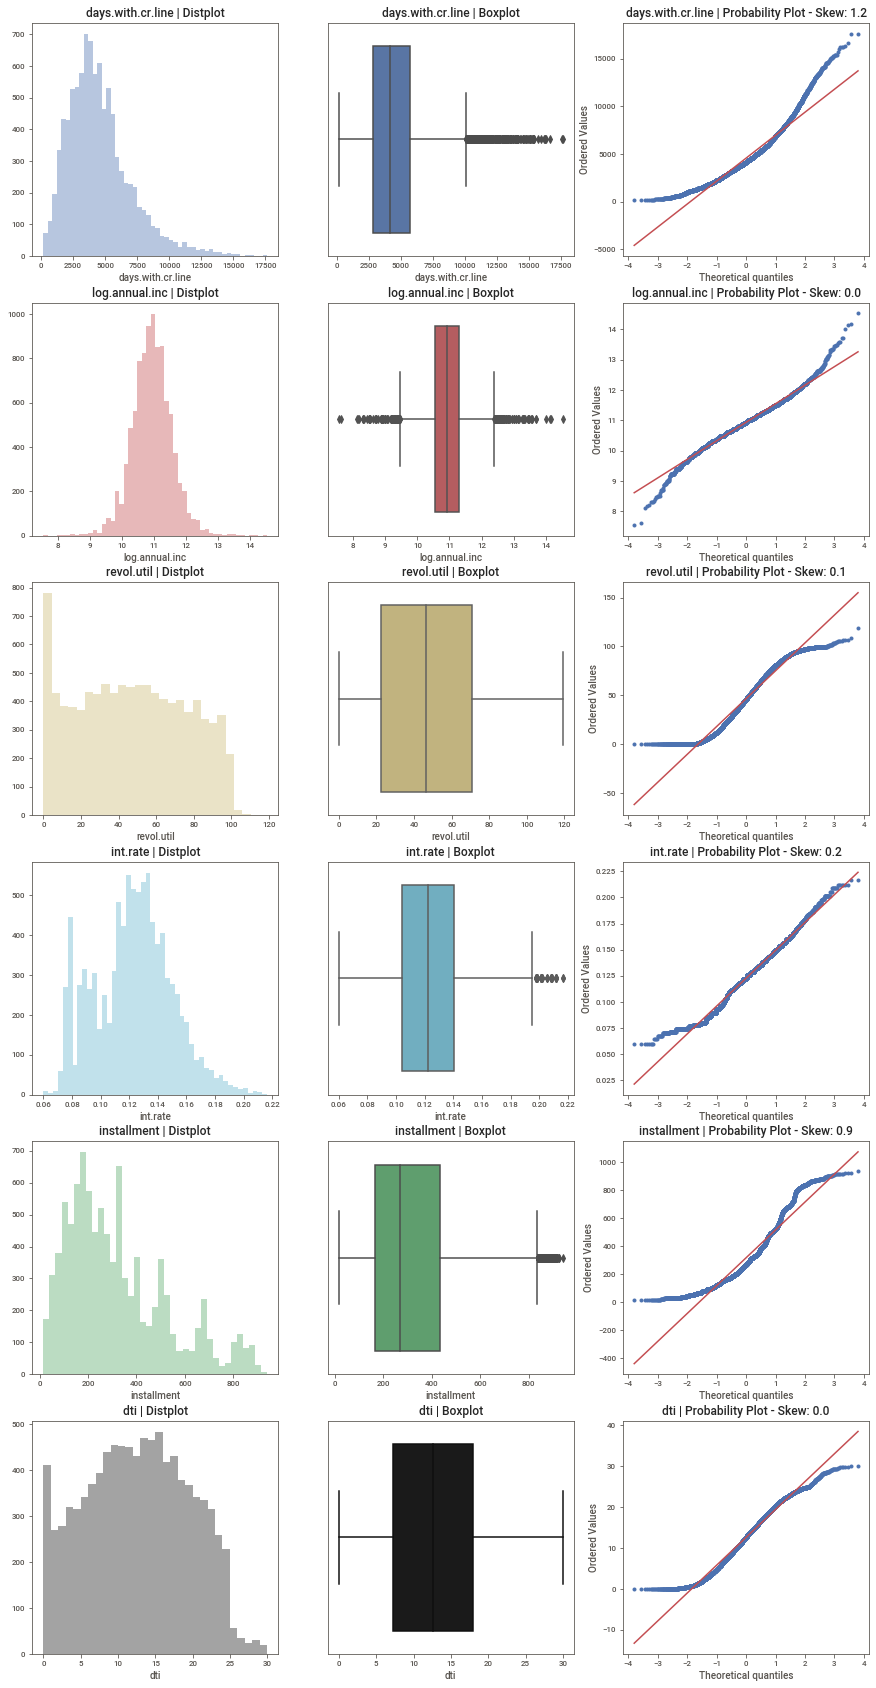

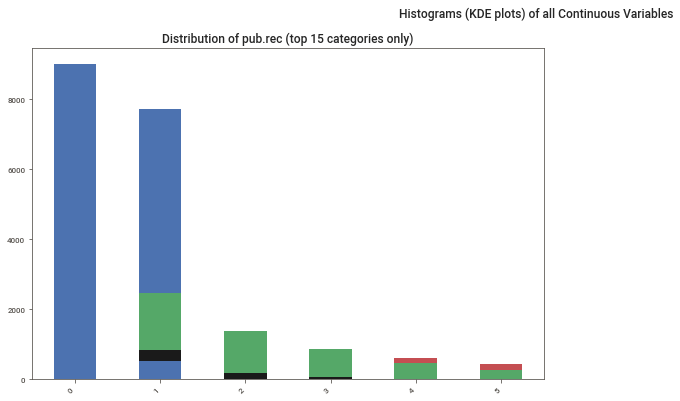

Could not draw Violin Plot


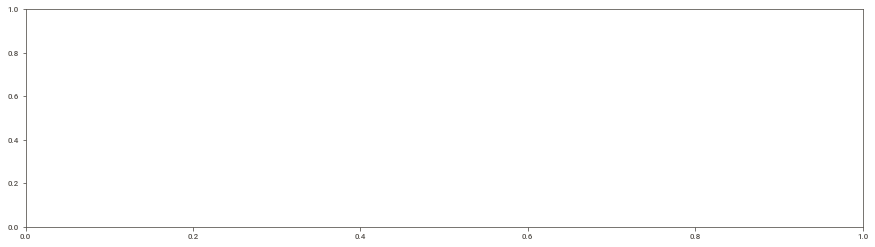

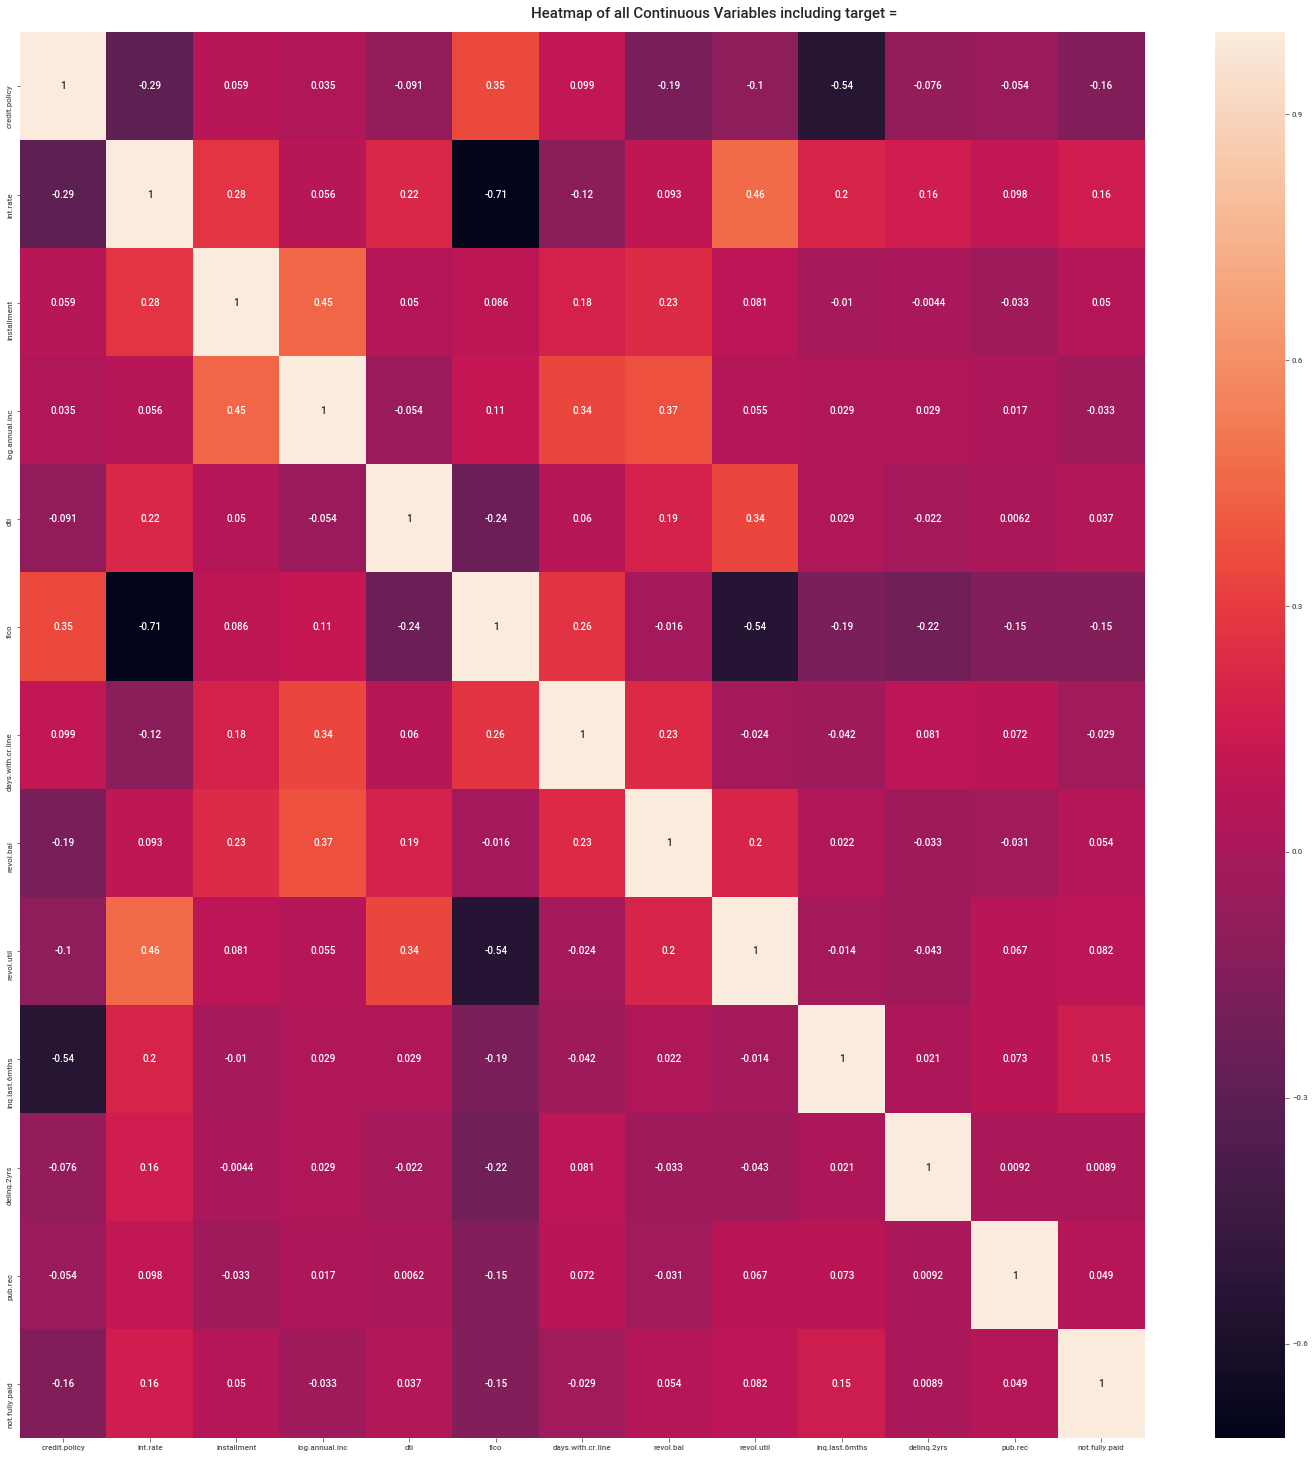

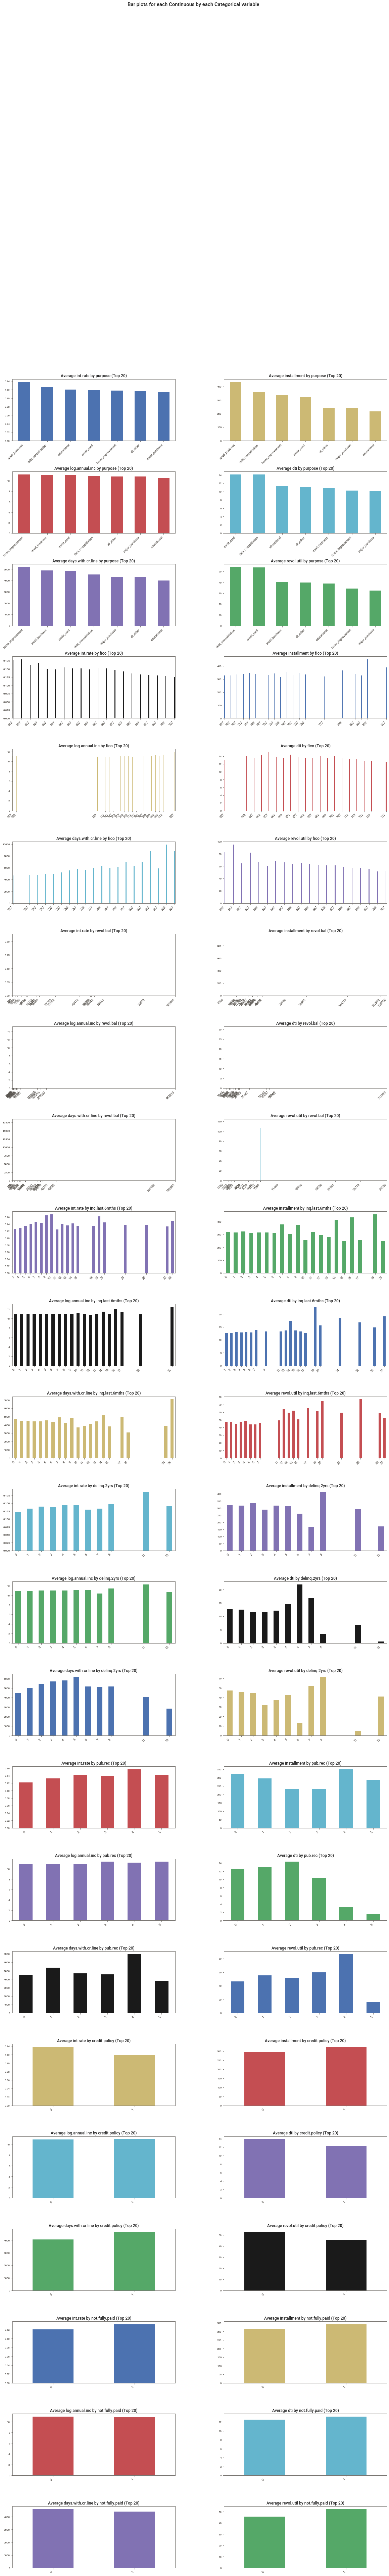

Time to run AutoViz (in seconds) = 13.344

 ###################### VISUALIZATION Completed ########################


In [54]:
import pandas as pd
from autoviz.AutoViz_Class import AutoViz_Class

#EDA using Autoviz
autoviz = AutoViz_Class().AutoViz('loan_data.csv')

In [55]:
import dtale
import pandas as pd

dtale.show(pd.read_csv("loan_data.csv"))


http://LAPTOP-AGR5GI15:40000/dtale/main/1
It looks like this data may have already been loaded to D-Tale based on shape and column names. Here is URL of the data that seems to match it:

None

If you still want to load this data please use the following command:

dtale.show(df, ignore_duplicate=True)


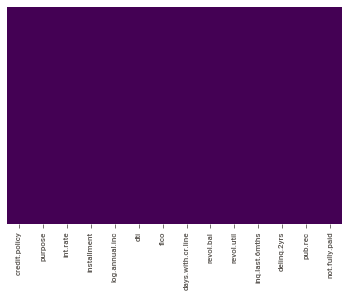

In [56]:
#check for null
sns.heatmap(loans.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [57]:
#check for null values
loans.isnull().any()

credit.policy        False
purpose              False
int.rate             False
installment          False
log.annual.inc       False
dti                  False
fico                 False
days.with.cr.line    False
revol.bal            False
revol.util           False
inq.last.6mths       False
delinq.2yrs          False
pub.rec              False
not.fully.paid       False
dtype: bool

In [58]:
#fill the null vale 
loans= loans.fillna(method='ffill')

In [7]:
loans.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

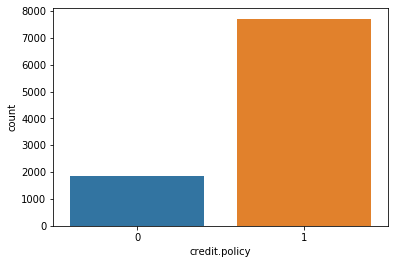

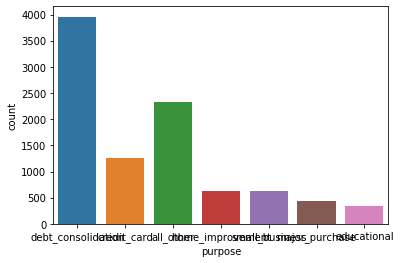

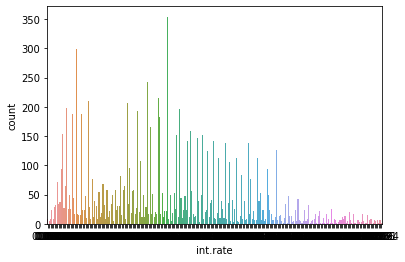

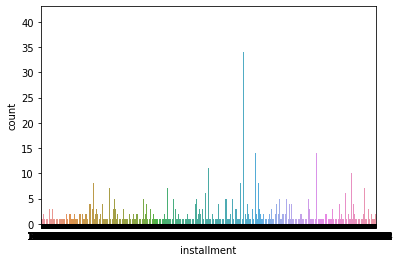

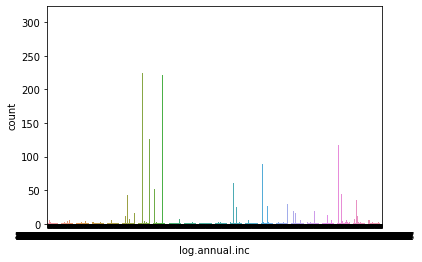

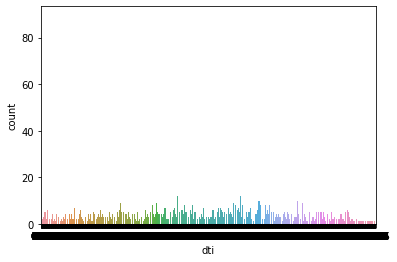

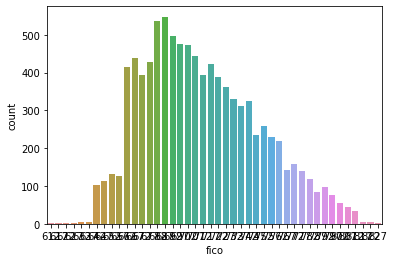

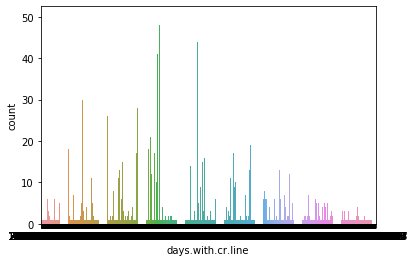

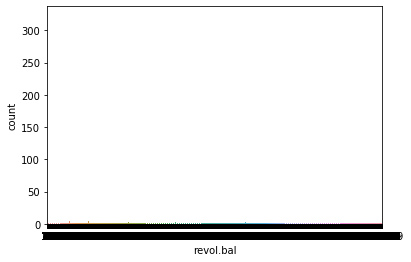

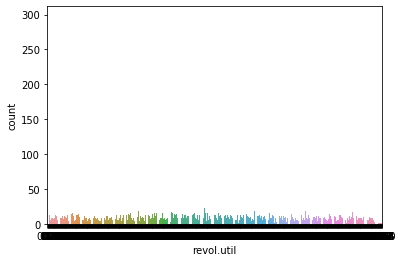

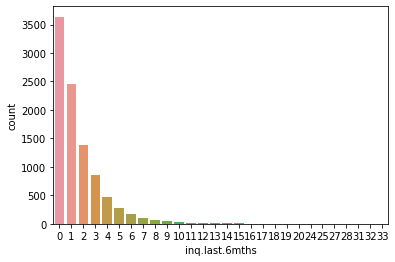

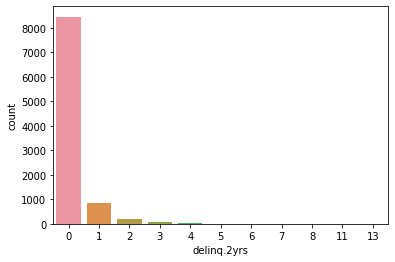

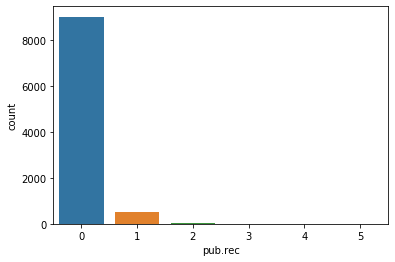

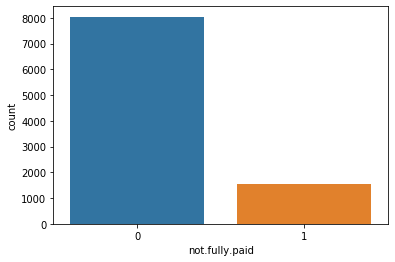

In [9]:
#Review Dataset

sns.countplot(loans['credit.policy'],label="Count")
plt.show()

sns.countplot(loans['purpose'],label="Count")
plt.show()

sns.countplot(loans['int.rate'],label="Count")
plt.show()

sns.countplot(loans['installment'],label="Count")
plt.show()

sns.countplot(loans['log.annual.inc'],label="Count")
plt.show()

sns.countplot(loans['dti'],label="Count")
plt.show()

sns.countplot(loans['fico'],label="Count")
plt.show()

sns.countplot(loans['days.with.cr.line'],label="Count")
plt.show()

sns.countplot(loans['revol.bal'],label="Count")
plt.show()


sns.countplot(loans['revol.util'],label="Count")
plt.show()


sns.countplot(loans['inq.last.6mths'],label="Count")
plt.show()

sns.countplot(loans['delinq.2yrs'],label="Count")
plt.show()

sns.countplot(loans['pub.rec'],label="Count")
plt.show()
sns.countplot(loans['not.fully.paid'],label="Count")
plt.show()

In [59]:
cat_feats = ['purpose']

In [60]:
#use the get dummies method to transform the categorical variable purpose. 
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [43]:
#show the final data info
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [61]:
#show the data
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [64]:
#show the final data columns
final_data.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

In [65]:
#split the data to train and test data 
from sklearn.model_selection import train_test_split
#we should predict the not.fully.paid column
X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Logistic Regression

In [66]:

logreg = LogisticRegression().fit(X_train, y_train)
print("Training set accuracy: {:.4f}".format(logreg.score(X_train, y_train)))
print("Test set accuracy: {:.4f}".format(logreg.score(X_test, y_test)))


logreg.coef_.T

print("Feature importances:\n{}".format(logreg.coef_.T))

Training set accuracy: 0.8421
Test set accuracy: 0.8330
Feature importances:
[[-7.94712937e-02]
 [ 6.23181563e-03]
 [ 7.41869380e-04]
 [-1.00596094e-02]
 [-2.57294792e-03]
 [-3.01392407e-03]
 [-2.51163087e-05]
 [ 1.67798002e-06]
 [ 6.25579289e-03]
 [ 1.08811173e-01]
 [ 1.60204315e-02]
 [ 2.03886168e-02]
 [-4.78716588e-02]
 [-6.57576508e-02]
 [ 2.16465062e-02]
 [ 1.00787432e-02]
 [-3.79790294e-03]
 [ 6.12088952e-02]]


[[1989    3]
 [ 397    6]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1992
           1       0.67      0.01      0.03       403

    accuracy                           0.83      2395
   macro avg       0.75      0.51      0.47      2395
weighted avg       0.81      0.83      0.76      2395



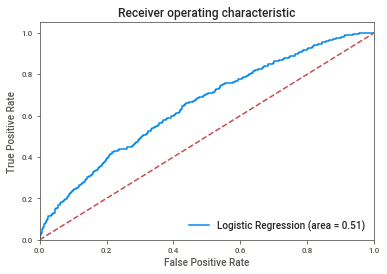

AUC: 0.649


In [67]:
#Confusion Matrix
y_pred = logreg.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

# Precision/Recall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# calculate AUC

print('AUC: %.3f' % metrics.auc(fpr, tpr))

Naive Bayes

Accuracy on training set: 0.8244
Accuracy on test set: 0.8192
[[1921   71]
 [ 362   41]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1992
           1       0.37      0.10      0.16       403

    accuracy                           0.82      2395
   macro avg       0.60      0.53      0.53      2395
weighted avg       0.76      0.82      0.77      2395



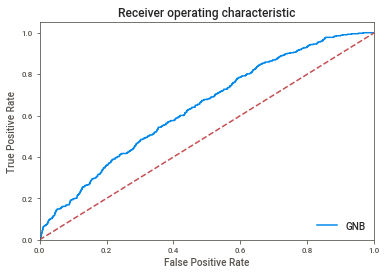

AUC: 0.639


In [68]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

print("Accuracy on training set: {:.4f}".format(gnb.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(gnb.score(X_test, y_test)))


#Confusion Matrix
y_pred = gnb.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

# Precision/Recall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
GNB_roc_auc = roc_auc_score(y_test, gnb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gnb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='GNB' % GNB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('GNB_ROC')
plt.show()

# calculate AUC

print('AUC: %.3f' % metrics.auc(fpr, tpr))


Decision Tree

Accuracy on training set: 0.8451
Accuracy on test set: 0.8251
Feature importances:
[0.42539312 0.18295795 0.09172618 0.         0.04357156 0.03305299
 0.01024392 0.         0.03912724 0.12618069 0.         0.
 0.         0.         0.         0.         0.         0.04774636]
[[1963   29]
 [ 390   13]]
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1992
           1       0.31      0.03      0.06       403

    accuracy                           0.83      2395
   macro avg       0.57      0.51      0.48      2395
weighted avg       0.75      0.83      0.76      2395



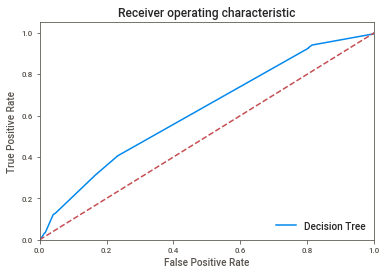

AUC: 0.623


In [72]:
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.4f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(tree.score(X_test, y_test)))

#Feature importance rates how important each feature is for the decision a tree makes. It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target.” 
#The feature importances always sum to 1

print("Feature importances:\n{}".format(tree.feature_importances_))

#Confusion Matrix
y_pred = tree.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

# Precision/Recall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
DT_roc_auc = roc_auc_score(y_test, tree.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, tree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

# calculate AUC

print('AUC: %.3f' % metrics.auc(fpr, tpr))

Random Forest

Accuracy on training set: 0.843
Accuracy on test set: 0.832
Feature importances:
[0.24376173 0.14489197 0.07097211 0.03636258 0.01984341 0.12463417
 0.03073428 0.03141087 0.06212264 0.16567115 0.00292941 0.0047209
 0.00419389 0.00148119 0.00297475 0.00080847 0.00159369 0.05089279]
[[1992    0]
 [ 403    0]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1992
           1       0.00      0.00      0.00       403

    accuracy                           0.83      2395
   macro avg       0.42      0.50      0.45      2395
weighted avg       0.69      0.83      0.76      2395



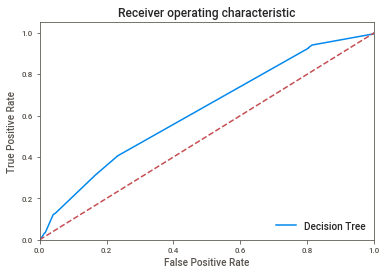

AUC: 0.623


In [73]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

print("Feature importances:\n{}".format(rf1.feature_importances_))


#Confusion Matrix
y_pred = rf1.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

# Precision/Recall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
RF_roc_auc = roc_auc_score(y_test, tree.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, tree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree' % RF_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

# calculate AUC

print('AUC: %.3f' % metrics.auc(fpr, tpr))

Support Vector Machine

Accuracy on training set: 0.84
Accuracy on test set: 0.83
[[1992    0]
 [ 403    0]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1992
           1       0.00      0.00      0.00       403

    accuracy                           0.83      2395
   macro avg       0.42      0.50      0.45      2395
weighted avg       0.69      0.83      0.76      2395



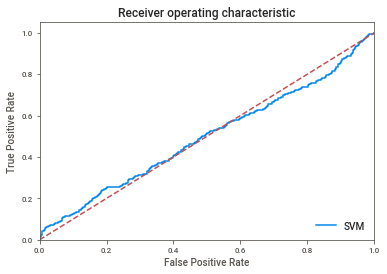

AUC: 0.496


In [74]:
#Support Vector Machine
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

# SVM requires all the features to vary on a similar scale. We will need to rescale our data that all the features are approximately on the same scale
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

svc = SVC(probability=True)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))
#print("Feature importances:\n{}".format(gb.feature_importances_))

#Confusion Matrix
y_pred = svc.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

# Precision/Recall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
SVM_roc_auc = roc_auc_score(y_test, svc.predict(X_test_scaled))
fpr, tpr, thresholds = roc_curve(y_test, svc.predict_proba(X_test_scaled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM' % SVM_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

# calculate AUC

print('AUC: %.3f' % metrics.auc(fpr, tpr))


Neural Networks

Accuracy on training set: 0.863
Accuracy on test set: 0.825
[[1954   38]
 [ 382   21]]
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1992
           1       0.36      0.05      0.09       403

    accuracy                           0.82      2395
   macro avg       0.60      0.52      0.50      2395
weighted avg       0.76      0.82      0.77      2395



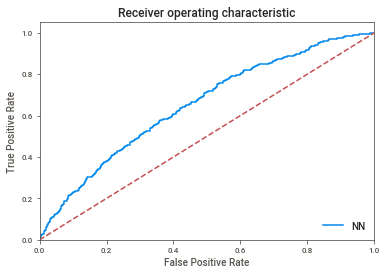

AUC: 0.651


In [75]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

#Neural networks also expect all input features to vary in a similar way, and ideally to have a mean of 0, and a variance of 1.
#Rescale our data to fulfills these requirements.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))


#Confusion Matrix
y_pred = mlp.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

# Precision/Recall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
NN_roc_auc = roc_auc_score(y_test, mlp.predict(X_test_scaled))
fpr, tpr, thresholds = roc_curve(y_test, mlp.predict_proba(X_test_scaled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NN' % NN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

# calculate AUC

print('AUC: %.3f' % metrics.auc(fpr, tpr))


